In [2]:
# to import from parent directory
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import numpy as np
from utils import load_obj, get_average
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
losses_one_layer = load_obj("FF_Extended_One_Layer")
losses_deep = load_obj("FF_Extended_Deep")

In [6]:
def extract_best_loss(losses):
    best_loss_12 = []
    avg_loss_12 = []
    best_loss_24 = []
    avg_loss_24 = []

    for k, v in losses.items():
        if k.split("-")[1] == str(12):
            best_net_index = np.argmin(v)
            best_loss_12.append(v[best_net_index])
            avg_loss_12.append(get_average(v))
        if k.split("-")[1] == str(24):
            best_net_index = np.argmin(v)
            best_loss_24.append(v[best_net_index])
            avg_loss_24.append(get_average(v))

    best_loss = []
    avg_loss = []

    for i in range(len(best_loss_12)):
        best_loss.append((best_loss_12[i] + best_loss_24[i]) / 2)
        avg_loss.append((avg_loss_12[i] + avg_loss_24[i]) / 2)

    return best_loss, avg_loss

In [8]:
best_loss_deep, avg_loss_deep = extract_best_loss(losses_deep)
best_loss_one = []
avg_loss_one = []

for k, v in losses_one_layer.items():
    best_net_index = np.argmin(v)
    best_loss_one.append(v[best_net_index])
    avg_loss_one.append(get_average(v))

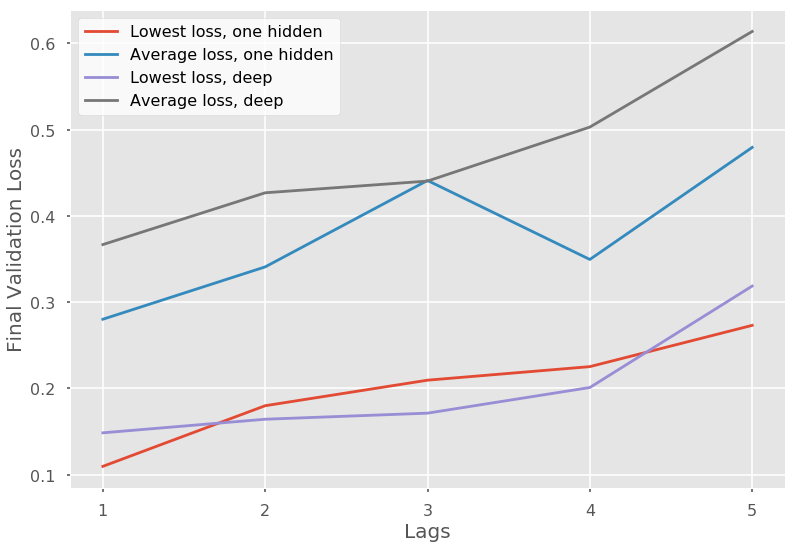

In [12]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

# plt.figure(figsize=(15,10))

plt.plot([i for i in range(1, len(best_loss_one) + 1)], best_loss_one)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], avg_loss_one)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], best_loss_deep)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], avg_loss_deep)

plt.xticks([1, 2, 3, 4, 5])

plt.legend(("Lowest loss, one hidden", "Average loss, one hidden",
           "Lowest loss, deep", "Average loss, deep"), facecolor="white")
plt.xlabel("Lags", fontsize=20)
plt.ylabel("Final Validation Loss", fontsize=20)
plt.savefig('../Figs/lags_extended.png', bbox_inches='tight')